__Задача 1__

Дана матрица объект-признак
```
X = [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]
```
и значения целевой переменной
```
y = [ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]
```

Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат. В качестве ответа запишите значение коэффициента детерминации для модели на этих признаках.

Уравнение модели в матричной форме:
$$Y = X \cdot b + E,$$
Задача - минимизировать расстояние между векторами $Y$ и $b \cdot X$:
$$Y и X \cdot b, :$$
$$\| Y - X \cdot b \| \rightarrow \min_b$$
Аналитической решение: $b = \left( X^\top X \right)^{-1} X^\top Y$

Для оценки качества модели используем коэффициент детерминации: $R^2 = 1 - \dfrac{SS_{res}}{SS_{y}},$ где $SS_Y = \sum_{i = 1}^n \left( y_i - \overline{Y} \right)^2$ — сумма квадратов отклонений значений массива $Y$ от среднего, а $SS_{res}$ — _остаточная сумма квадратов_, т.е. сумма квадратов отклонений элементов массива $E$ от их среднего. Также: $R^2 = r_{YZ}^2$, где  $r_{YZ}^2$ - квадрат коэффициента корреляции Пирсона.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from itertools import combinations

In [49]:
X = np.array([[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
              [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
              [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
              [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
              [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
              [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
              [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
              [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
              [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
              [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]])

y = np.array([ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
               7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218])

In [3]:
def determination_coef(errors: np.ndarray, y_true: np.ndarray, y_pred: np.ndarray) -> float:
    square_errors = ((errors - errors.mean()) ** 2).sum()
    square_true = ((y_true - y_true.mean()) ** 2).sum()
    R = 1 - square_errors / square_true
    R_n = np.corrcoef(y_true, y_pred)**2
    R_sk = r2_score(y_true, y_pred)
    print(f'R2 coef: {R}, R2 coef from sq. cov: {R_n[0,1]}, R2 coef from sklearn: {R_sk}')
    return R

In [4]:
def linear_regression(X: np.ndarray, y: np.ndarray, indices: tuple) -> float:
    ones = np.ones((X.shape[0], 1))
    X = np.hstack((ones, X[:, indices]))
    print(f'Number of factors (features): {X.shape[1]-1}, cols: {indices}')
    X_ = X.T.dot(X)
    X_ = np.linalg.inv(X_)
    b = X_.dot(X.T).dot(y)
    y_pred = X.dot(b)
    errors = y - y_pred
    print(f'Mean error: {errors.mean():5f}')
    R = determination_coef(errors=errors, y_true=y, y_pred=y_pred)
    return R

In [5]:
indices = np.arange(4)
r_scores = np.array([])
subsets = []
for idx in combinations(indices, r=X.shape[1]-2):
    R = linear_regression(X, y, idx)
    r_scores = np.append(r_scores, R)
    subsets.append(idx)

Number of factors (features): 2, cols: (0, 1)
Mean error: 0.000000
R2 coef: 0.18113594742585215, R2 coef from sq. cov: 0.18113594742585226, R2 coef from sklearn: 0.18113594742585215
Number of factors (features): 2, cols: (0, 2)
Mean error: -0.000000
R2 coef: 0.7634246238793151, R2 coef from sq. cov: 0.763424623879315, R2 coef from sklearn: 0.7634246238793151
Number of factors (features): 2, cols: (0, 3)
Mean error: 0.000000
R2 coef: 0.4532966783144077, R2 coef from sq. cov: 0.45329667831440773, R2 coef from sklearn: 0.4532966783144077
Number of factors (features): 2, cols: (1, 2)
Mean error: 0.000000
R2 coef: 0.5479482734039008, R2 coef from sq. cov: 0.5479482734039008, R2 coef from sklearn: 0.5479482734039008
Number of factors (features): 2, cols: (1, 3)
Mean error: 0.000000
R2 coef: 0.6062055761129932, R2 coef from sq. cov: 0.6062055761129934, R2 coef from sklearn: 0.6062055761129932
Number of factors (features): 2, cols: (2, 3)
Mean error: -0.000000
R2 coef: 0.622441987650532, R2 co

In [6]:
subsets[np.argmax(r_scores)]

(0, 2)

In [47]:
linear_regression(StandardScaler().fit_transform(X), y, (0,2))  # looks like features were already scaled in X

Number of factors (features): 2, cols: (0, 2)
Mean error: -0.000000
R2 coef: 0.7634246238793152, R2 coef from sq. cov: 0.7634246238793152, R2 coef from sklearn: 0.7634246238793152


0.7634246238793152

In [48]:
# check the solution
regr = LinearRegression()
regr.fit(X[:, (0,2)], y)
y_pred = regr.predict(X[:, (0,2)])
r2_score(y, y_pred)

0.7634246238793152

Коэффициент детерминации: $0.76342462$

__Задача 2__

Является ли значимым уравнение регрессии, полученное в предыдущей задаче? В качестве ответа запишите 1, если является, и 0 иначе.

Для данной цели используется $F-тест$

При $F-тесте$ используется статистика:
$$F = \dfrac{R^2 / m}{(1 - R^2) / (n - m - 1)},$$
где $R^2$ — коэффициент детерминации, $n$ — число наблюдений, $m$ — число факторов. Такая статистика в предположении верности нулевой гипотезы (о том, что коэффициент детерминации $R^2$ равен 0) имеет __F-распределение Фишера__ с параметрами $k_1 = m$, $k_2 = n - m - 1$.

In [26]:
n = X.shape[0]
m = 2
k1 = m
k2 = n - m - 1
k1, k2

(2, 7)

In [27]:
# significance level and quantile
alpha = 0.05
t = stats.f.ppf(1 - alpha, k1, k2)
t

4.73741412777588

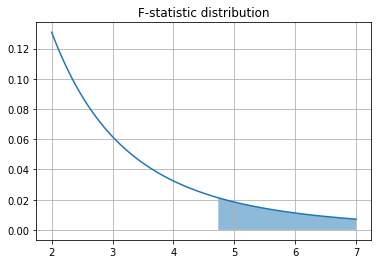

In [28]:
ox = np.linspace(2, 7, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 7, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.title('F-statistic distribution')
plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5)
plt.grid()
plt.show()

In [29]:
# statistic value
R = linear_regression(X, y, (0,2))
F = (R / k1) / ((1 - R) / k2)
F

Number of factors (features): 2, cols: (0, 2)
Mean error: -0.000000
R2 coef: 0.7634246238793151, R2 coef from sq. cov: 0.763424623879315, R2 coef from sklearn: 0.7634246238793151


11.294439122922642

In [13]:
'H_0 is true' if F < t else 'H_1 is true, H_0 rejected'  # H_1 that R^2 is not equal 0 

'H_1 is true, H_0 rejected'

In [14]:
p_value = 1 - stats.f.cdf(F, dfn=k1, dfd=k2)  # for one-sided critical area
p_value  # p-value < alpha => the model is statistically significant: H_1, ANSWER: 1

0.006440111511545332

Модель статистически значима, ответ: 1

Доверительные интервалы для каждого фактора (признака). К задаче не относится

In [59]:
# optional: confidence intervals for given factors separately
def pair_lr(x: np.ndarray, y: np.ndarray) -> tuple:
    b1 = np.cov(x, y, ddof=1)[0, 1] / np.var(x, ddof=1)
    b0 = y.mean() - b1 * x.mean()
    z = b0 + b1 * x
    e = y - z
    return b1, b0, z, e

def standard_error_slope(x: np.ndarray, y: np.ndarray, z: np.ndarray) -> float:
    n = x.shape[0]
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()  
    return np.sqrt(upper / lower)

def get_interval(x: np.ndarray, y: np.ndarray, alpha=0.05) -> tuple:
    b1, b0, z, _ = pair_lr(x, y)
    s_slope = standard_error_slope(x, y, z)
    n = x.shape[0]
    t1 = stats.t.ppf(alpha / 2, df=n - 2)
    t2 = stats.t.ppf(1 - alpha / 2, df=n - 2)
    b1_lower, b1_upper = (b1 + t1 * s_slope, b1 + t2 * s_slope)
    return b0, b1, b1_lower, b1_upper

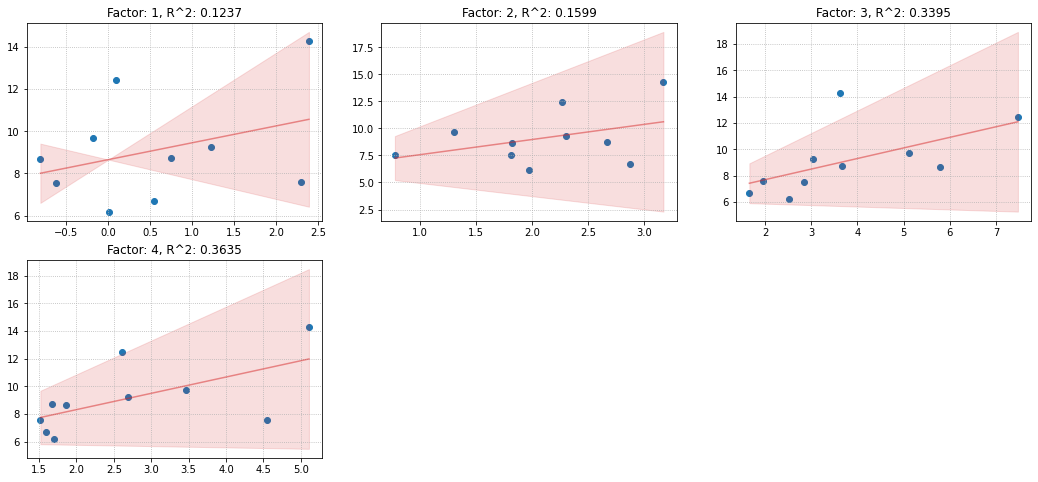

In [60]:
plt.figure(figsize=(18, 8))
for i in range(4):
    plt.subplot(2, 3, i+1)
    plt.title(f'Factor: {i+1}, R^2: {(np.corrcoef(X[:, i], y) ** 2)[0,1]:.4f}')
    b0, b1, b1_lower, b1_upper = get_interval(X[:, i], y)
    plt.scatter(X[:, i], y)
    ox = X[:, i].copy()
    ox.sort()
    plt.grid(ls='dotted')
    plt.plot(ox, b0 + b1 * ox, color='C3', alpha=0.5)
    plt.fill_between(ox, b0 + b1_lower * ox, b0 + b1_upper * ox, color='C3', alpha=0.15)
plt.show()

__Задача 3__

Для проведения A/B-тестирования сайта интернет-магазина были получены следующие данные: страница `A` была посещена 2509 раз, из них 77 закончились совершением покупки, страница `B` была посещена 1465 раз, 60 из них закончились совершением покупки. Является ли значимым отличие конверсии на страницах `A` и `B`? В качестве ответа запишите 1, если является, и 0 иначе.

_Подсказка_. Реализуйте двухвыборочный t-тест. В качестве выборок здесь можно взять наборы меток совершения покупки (0 или 1) каждым посетителем.

Требуется проверить гипотезу о том, что математические ожидания двух соответствующих распределений равны, т.е.
$H_0: \: M(D_1) = M(D_2)$, т.е. выборки принадлежат одной генеральной совокупности.

Используем статистику: $t = \dfrac{\overline{X_1} - \overline{X_2}}{\sigma_\Delta}$, имеющую распределение Стьюдента.
Тогда: 
$$\sigma_\Delta = \sqrt{\dfrac{\sigma_{X_1}^2}{n_1} + \dfrac{\sigma_{X_2}^2}{n_2}},$$
$$df = \dfrac{\left( \dfrac{\sigma_{X_1}^2}{n_1} + \dfrac{\sigma_{X_2}^2}{n_2} \right)^2}{\dfrac{\left( \sigma_{X_1}^2 / n_1 \right)^2}{n_1 - 1} + \dfrac{\left( \sigma_{X_2}^2 / n_2 \right)^2}{n_2 - 1}}$$

In [21]:
A = np.zeros((2509,))
B = np.zeros((1465,))
A[-77:] = 1
B[-60:] = 1
A.mean(), B.mean()

(0.03068951773614986, 0.040955631399317405)

In [16]:
n1 = A.size
n2 = B.size

s1 = A.std(ddof=1)
s2 = B.std(ddof=1)

In [17]:
s_delta = np.sqrt(s1 ** 2 / n1 + s2 ** 2 / n2)
s_delta

0.006220171278295827

In [18]:
t = (A.mean() - B.mean()) / s_delta
t

-1.6504551408398205

In [19]:
df = (s1 ** 2 / n1 + s2 ** 2 / n2) ** 2 / \
    ((s1 ** 2 / n1) ** 2 / (n1 - 1) + (s2 ** 2 / n2) ** 2 / (n2 - 1))

df

2732.8025644352133

In [20]:
alpha = 0.05

t1 = stats.t.ppf(alpha / 2, df=df)
t2 = stats.t.ppf(1 - alpha / 2, df=df)

t1, t2

(-1.9608324352746576, 1.9608324352746571)

In [22]:
'H_0 that M(A) = M(B)' if t < t2 and t > t1 else 'H_1: samples were taken from different distributions'

'H_0 that M(A) = M(B)'

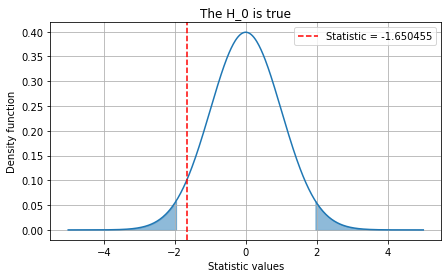

In [23]:
ox = np.linspace(-5, 5, 500)
oy = stats.t.pdf(ox, df=df)

ox_left = np.linspace(-5, t1, 100)
oy_left = stats.t.pdf(ox_left, df=df)

ox_right = np.linspace(t2, 5, 100)
oy_right = stats.t.pdf(ox_right, df=df)

plt.figure(figsize=(7,4))
plt.plot(ox, oy)
plt.axvline(t, ls='--', lw=1.5, c='r', label=f'Statistic = {t:5f}')
hyp = 'The H_0 is true' if t < t2 and t > t1 else 'H_1 is true'
plt.title(hyp)
plt.fill_between(ox_left, oy_left, alpha=0.5, color='C0')
plt.fill_between(ox_right, oy_right, alpha=0.5, color='C0')
plt.xlabel('Statistic values')
plt.ylabel('Density function')
plt.grid()
plt.legend(loc='upper right')
plt.show()

In [24]:
p_left = stats.t.cdf(t, df=df)
p_right = 1 - stats.t.cdf(t, df=df)

pvalue = 2 * min(p_left, p_right)

print(f'P-value for test: {pvalue:4f}')
print(f'H_0 is true' if pvalue > alpha else 'H_1 is true, H_0 rejected')

P-value for test: 0.098965
H_0 is true


In [25]:
stats.ttest_ind(A, B, equal_var=False)

Ttest_indResult(statistic=-1.6504551408398205, pvalue=0.09896479217925898)

Значит отличие конверсии на страницах `A` и `B` не является значимым для заданного уровня значимости $\alpha = 0.05$. Ответ: $0$